In [1]:
import pandas as pd
import requests
import re

In [2]:
%%time

# Define the API endpoint and parameters
url = "https://data.cityofchicago.org/resource/cwig-ma7x.json"

# Fetch the total count of records
def get_total_count(url):
    params = {
        "$select": "count(*)"
    }
    response = requests.get(url, params=params)
    data = response.json()
    return int(data[0]['count'])

total_count = get_total_count(url)
print(f"Total number of records available: {total_count:,.0f}")

Total number of records available: 266,257
CPU times: user 31.4 ms, sys: 8.62 ms, total: 40.1 ms
Wall time: 545 ms


In [3]:
%%time

# Fetch data and load it into a pandas DataFrame
def fetch_data(url, params):
    response = requests.get(url, params=params)
    data = response.json()
    return pd.DataFrame(data)

# Set the limit parameter equal to the number of available records
params = {
    "$limit": total_count
}

# Fetch the data and load it into a DataFrame
df = fetch_data(url, params)

print(f'Number of records retrieved: {df.shape[0]:,.0f}')

Number of records retrieved: 266,257
CPU times: user 7.9 s, sys: 1.61 s, total: 9.5 s
Wall time: 1min 7s


In [4]:
df.head(5)

,inspection_id,dba_name,aka_name,license_,facility_type,risk,address,city,state,zip,...,results,latitude,longitude,location,:@computed_region_awaf_s7ux,:@computed_region_6mkv_f3dw,:@computed_region_vrxf_vc4k,:@computed_region_bdys_3d7i,:@computed_region_43wa_7qmu,violations
0,2588065,TEMPORIS,TEMPORIS,2446729,Restaurant,Risk 1 (High),933 N ASHLAND AVE,CHICAGO,IL,60622,...,No Entry,41.89890432084078,-87.66722318342336,"{'type': 'Point', 'coordinates': [-87.66722318...",41,21560,25,484,41,NaN
1,2588027,HONG KONG RESTAURANT,HONG KONG RESTAURANT,73985,Restaurant,Risk 1 (High),2757 W 55TH ST,CHICAGO,IL,60632,...,No Entry,41.79358358477864,-87.6936494146877,"{'type': 'Point', 'coordinates': [-87.69364941...",19,22248,61,112,3,NaN
2,2588004,DUNKIN DONUTS,DUNKIN DONUTS,1273761,Restaurant,Risk 2 (Medium),7578 N WESTERN AVE,CHICAGO,IL,60645,...,Pass,42.01943899868734,-87.69032202208334,"{'type': 'Point', 'coordinates': [-87.69032202...",42,22528,20,359,27,NaN
3,2588047,QUON YICK FOOD CO.,QUON YICK FOOD CO.,2542670,Bakery,Risk 2 (Medium),639 W 26TH ST,CHICAGO,IL,60616,...,Pass,41.8452647795405,-87.64297680126111,"{'type': 'Point', 'coordinates': [-87.64297680...",26,21194,58,688,48,NaN
4,2588023,BARTON ELEMENTARY SCHOOL,BARTON ELEMENTARY SCHOOL,22151,School,Risk 1 (High),7650 S Wolcott (1900W),CHICAGO,IL,60620,...,Fail,41.75421962168018,-87.67096452829065,"{'type': 'Point', 'coordinates': [-87.67096452...",6,21554,70,573,31,"3. MANAGEMENT, FOOD EMPLOYEE AND CONDITIONAL E..."


filtering the data for failed inspections and only keeping records where Violations description is not blank. 

In [5]:
df = df[df['results']=='Fail']
df[df['violations'].isna()]

In [7]:
df.dropna(subset=['violations'], inplace=True)

In [52]:
pd.set_option('max_colwidth', 800)

In [54]:
df

,inspection_id,dba_name,aka_name,license_,facility_type,risk,address,city,state,zip,...,longitude,location,:@computed_region_awaf_s7ux,:@computed_region_6mkv_f3dw,:@computed_region_vrxf_vc4k,:@computed_region_bdys_3d7i,:@computed_region_43wa_7qmu,violations,descriptions,comments
4,2588023,BARTON ELEMENTARY SCHOOL,BARTON ELEMENTARY SCHOOL,22151,School,Risk 1 (High),7650 S Wolcott (1900W),CHICAGO,IL,60620,...,-87.67096452829065,"{'type': 'Point', 'coordinates': [-87.67096452829065, 41.75421962168018]}",6,21554,70,573,31,"3. MANAGEMENT, FOOD EMPLOYEE AND CONDITIONAL EMPLOYEE; KNOWLEDGE, RESPONSIBILITIES AND REPORTING - Comments: OBSERVED NO SIGNED EMPLOYEES HEALTH POLICIES MUST PROVIDE AND MAINTAIN.(PRIORITY FOUNDATION 7-38-010) | 10. ADEQUATE HANDWASHING SINKS PROPERLY SUPPLIED AND ACCESSIBLE - Comments: OBSERVED HOT RUNNING WATER TEMPERATURE AT HAND SINKS IN TOILET ROOMS OF PRE-K 113 AT 74.1F AND PRE-K 115- AT 71.4F MUST HAVE HOT RUNNING WATER AT 100.0F. MUST REPAIR AND MAINTAIN.(PRIORITY 7-38-030(C) | 10. ADEQUATE HANDWASHING SINKS PROPERLY SUPPLIED AND ACCESSIBLE - Comments: OBSERVED NO HAND DRYING DEVICE AT HAND SINK IN 1ST FL. BOY'S MAIN BUILDING MUST PROVIDE AND MAINTAIN.(PRIORITY FOUNDATION 7-38-030(C) | 10. ADEQUATE HANDWASHING SINKS PROPERLY SUPPLIED AND ACCESSIBLE - Comments: OBSERVED NO HAND...","[(MANAGEMENT, FOOD EMPLOYEE AND CONDITIONAL EMPLOYEE; KNOWLEDGE, RESPONSIBILITIES AND REPORTING, ), (, ADEQUATE HANDWASHING SINKS PROPERLY SUPPLIED AND ACCESSIBLE), (, ADEQUATE HANDWASHING SINKS PROPERLY SUPPLIED AND ACCESSIBLE), (, ADEQUATE HANDWASHING SINKS PROPERLY SUPPLIED AND ACCESSIBLE), (, ADEQUATE HANDWASHING SINKS PROPERLY SUPPLIED AND ACCESSIBLE), (, THERMOMETERS PROVIDED & ACCURATE), (, INSECTS, RODENTS, & ANIMALS NOT PRESENT), (, CONTAMINATION PREVENTED DURING FOOD PREPARATION, STORAGE & DISPLAY), (, FOOD & NON-FOOD CONTACT SURFACES CLEANABLE, PROPERLY DESIGNED, CONSTRUCTED & USED), (, NON-FOOD/FOOD CONTACT SURFACES CLEAN), (, TOILET FACILITIES: PROPERLY CONSTRUCTED, SUPPLIED, & CLEANED), (, PHYSICAL FACILITIES INSTALLED, MAINTAINED & CLEAN), (, PHYSICAL FACILITIES INSTALLE...","[ OBSERVED NO SIGNED EMPLOYEES HEALTH POLICIES MUST PROVIDE AND MAINTAIN.(PRIORITY FOUNDATION 7-38-010), OBSERVED HOT RUNNING WATER TEMPERATURE AT HAND SINKS IN TOILET ROOMS OF PRE-K 113 AT 74.1F AND PRE-K 115- AT 71.4F MUST HAVE HOT RUNNING WATER AT 100.0F. MUST REPAIR AND MAINTAIN.(PRIORITY 7-38-030(C), OBSERVED NO HAND DRYING DEVICE AT HAND SINK IN 1ST FL. BOY'S MAIN BUILDING MUST PROVIDE AND MAINTAIN.(PRIORITY FOUNDATION 7-38-030(C), OBSERVED NO HAND WASHING SIGNS IN SERVING LINE,PRIMARY BUILDING -1ST FL. BOY'S & 2ND FL. GIRL'S.MAIN BUILDING- 2ND FL. STAFF MUST PROVIDE AND MAINTAIN., MUST ADJUST PRE-K 113-LOW HOT WATER PRESSURE AT TALL HAND SINK IN CLASSROOM,PRIMARY BUILDING-1ST FL. BOY'S LOW HOT WATER PRESSURE .MUST ADJUST FAUCET HANDLES TO STAY ON LONGER FOR HAND WASHING MAIN..."
9,2588059,"BRIGHT SCHOLARS ACADEMY, LLC",BRIGHT SCHOLARS ACADEMY,2506770,Children's Services Facility,Risk 1 (High),8501-8503 S ASHLAND AVE,CHICAGO,IL,60620,...,-87.66300791918849,"{'type': 'Point', 'coordinates': [-87.66300791918849, 41.739343208088016]}",18,21554,70,531,13,"10. ADEQUATE HANDWASHING SINKS PROPERLY SUPPLIED AND ACCESSIBLE - Comments: OBSERVED HOT RUNNING WATER TEMPERATURE AT HAND SINKS IN KITCHEN - 87.8F.GIRL'S TOILET ROOM - 87.1F-87.4F.BOY'S TOILET ROOM-85.8F.FRONT STAFF TOILET ROOM-86.0F.BOTH TEACHERS SINKS IN GREEN CLASSROOM- 88.2F.MUST HAVE HOT RUNNING WATER AT 100.0F. MUST REPAIR AND MAINTAIN.(PRIORITY 7-38-030(C)(CITATION ISSUED) | 38. INSECTS, RODENTS, & ANIMALS NOT PRESENT - Comments: OBSERVED A GAP ALONG LEFT SIDE OF REAR DOOR MUST MAKE TIGHT FITTING. | 47. FOOD & NON-FOOD CONTACT SURFACES CLEANABLE, PROPERLY DESIGNED, CONSTRUCTED & USED - Comments: MUST ELIMINATE CRATES USED FOR FOOD STORAGE IN REAR STORAGE AREA AND PROVIDE ADEQUATE SHELVING UNITS. | 48. WAREWASHING FACILITIES: INSTALLED, MAINTAINED & USED; TEST STRIPS - Comments:.

Using regex,to separate the violation description and comments into separate data frame columns.

In [10]:
df['descriptions'] = df['violations'].apply(lambda x: re.findall(r'^\d{1,2}\.\s(.*?)(?=\s\-|\s\||\|)|\s\|\s\d{1,2}\.\s(.*?)(?=\s\-|\s\||\|)',x))

In [11]:
vio = list()
for i in df['descriptions']:
    for j in i:
        if j[0]=='':
            vio.append(j[1])
        elif j[1]=='':
            vio.append(j[0])
            

In [12]:
vio

['MANAGEMENT, FOOD EMPLOYEE AND CONDITIONAL EMPLOYEE; KNOWLEDGE, RESPONSIBILITIES AND REPORTING',
 'ADEQUATE HANDWASHING SINKS PROPERLY SUPPLIED AND ACCESSIBLE',
 'ADEQUATE HANDWASHING SINKS PROPERLY SUPPLIED AND ACCESSIBLE',
 'ADEQUATE HANDWASHING SINKS PROPERLY SUPPLIED AND ACCESSIBLE',
 'ADEQUATE HANDWASHING SINKS PROPERLY SUPPLIED AND ACCESSIBLE',
 'THERMOMETERS PROVIDED & ACCURATE',
 'INSECTS, RODENTS, & ANIMALS NOT PRESENT',
 'CONTAMINATION PREVENTED DURING FOOD PREPARATION, STORAGE & DISPLAY',
 'FOOD & NON-FOOD CONTACT SURFACES CLEANABLE, PROPERLY DESIGNED, CONSTRUCTED & USED',
 'NON-FOOD/FOOD CONTACT SURFACES CLEAN',
 'TOILET FACILITIES: PROPERLY CONSTRUCTED, SUPPLIED, & CLEANED',
 'PHYSICAL FACILITIES INSTALLED, MAINTAINED & CLEAN',
 'PHYSICAL FACILITIES INSTALLED, MAINTAINED & CLEAN',
 'PHYSICAL FACILITIES INSTALLED, MAINTAINED & CLEAN',
 'ADEQUATE HANDWASHING SINKS PROPERLY SUPPLIED AND ACCESSIBLE',
 'INSECTS, RODENTS, & ANIMALS NOT PRESENT',
 'FOOD & NON-FOOD CONTACT SURFAC

In [13]:
df['comments']= df['violations'].apply(lambda x:re.findall(r'\s\-\s\w+\:(.*?)(?=\s\|\s|$)',x))

In [14]:
import nltk
nltk.download('popular', halt_on_error=False)



[nltk_data] Downloading collection 'popular'
[nltk_data]    | 
[nltk_data]    | Downloading package cmudict to
[nltk_data]    |     /Users/ashmitamukherjee/nltk_data...
[nltk_data]    |   Package cmudict is already up-to-date!
[nltk_data]    | Downloading package gazetteers to
[nltk_data]    |     /Users/ashmitamukherjee/nltk_data...
[nltk_data]    |   Package gazetteers is already up-to-date!
[nltk_data]    | Downloading package genesis to
[nltk_data]    |     /Users/ashmitamukherjee/nltk_data...
[nltk_data]    |   Package genesis is already up-to-date!
[nltk_data]    | Downloading package gutenberg to
[nltk_data]    |     /Users/ashmitamukherjee/nltk_data...
[nltk_data]    |   Package gutenberg is already up-to-date!
[nltk_data]    | Downloading package inaugural to
[nltk_data]    |     /Users/ashmitamukherjee/nltk_data...
[nltk_data]    |   Package inaugural is already up-to-date!
[nltk_data]    | Downloading package movie_reviews to
[nltk_data]    |     /Users/ashmitamukherjee/nltk

True

In [15]:
import os, requests, sys
import nltk as nltk
import nltk.corpus  
from nltk.text import Text
import pandas as pd


In [16]:
print(sys.version)

3.9.13 (main, Aug 25 2022, 18:29:29) 
[Clang 12.0.0 ]


Tokenize violation description and comment columns

In [17]:
words=list()
for i in vio:
    tokens = nltk.tokenize.word_tokenize(i)
    words.extend(tokens)

In [18]:
words1=list()
for i in df['comments']:
    for j in i:
        tokens= nltk.tokenize.word_tokenize(j)
        words1.extend(tokens)

In [19]:
vio_freq = nltk.FreqDist(words)
com_freq = nltk.FreqDist(words1)

Finding top-10 tokens of each column

In [20]:
vio_freq.most_common(10)

[(',', 372602),
 ('AND', 172932),
 (':', 128963),
 ('FOOD', 89357),
 ('MAINTAINED', 89315),
 ('&', 80646),
 ('PROPERLY', 74616),
 ('CLEAN', 71488),
 ('INSTALLED', 69327),
 ('CONSTRUCTED', 68322)]

In [22]:
com_freq.most_common(10)

[('.', 739881),
 ('AND', 376142),
 (',', 356637),
 ('THE', 278741),
 ('IN', 251409),
 ('TO', 240648),
 ('OF', 162783),
 ('MUST', 151928),
 ('ON', 143719),
 ('INSTRUCTED', 131733)]

Cleaning each column: convert to lower case, remove stopwords, punctuation, numbers, etc

In [29]:
from nltk.corpus import stopwords

In [30]:
default_stopwords = set(nltk.corpus.stopwords.words('english'))

Finding top-10 tokens again

In [32]:
stopwords = set(nltk.corpus.stopwords.words('english'))

# Remove single-character tokens (mostly punctuation)
words = [word for word in words if len(word) > 1]

# Remove numbers
words = [word for word in words if not word.isnumeric()]

# Remove punctuation
words = [word for word in words if word.isalpha()]

# Lowercase all words (default_stopwords are lowercase too)
words_lc = [word.lower() for word in words]

# Remove stopwords
words_lc = [word for word in words_lc if word not in stopwords]


fdist = nltk.FreqDist(words_lc)

print(fdist)

#fdist.items() - will give all words
fdist.most_common(10)

<FreqDist with 327 samples and 2415207 outcomes>


[('food', 89357),
 ('maintained', 89315),
 ('properly', 74616),
 ('clean', 71488),
 ('installed', 69327),
 ('constructed', 68322),
 ('equipment', 64912),
 ('surfaces', 51529),
 ('cleaning', 48281),
 ('contact', 47996)]

In [33]:
stopwords = set(nltk.corpus.stopwords.words('english'))

# Remove single-character tokens (mostly punctuation)
words1 = [word1 for word1 in words1 if len(word1) > 1]

# Remove numbers
words1 = [word for word in words1 if not word.isnumeric()]

# Remove punctuation
words1 = [word1 for word1 in words1 if word1.isalpha()]

# Lowercase all words (default_stopwords are lowercase too)
words_lc1 = [word1.lower() for word1 in words1]

# Remove stopwords
words_lc1 = [word1 for word1 in words_lc1 if word1 not in stopwords]


fdist1 = nltk.FreqDist(words_lc1)

print(fdist1)

#fdist.items() - will give all words
fdist1.most_common(10)

<FreqDist with 23654 samples and 6643249 outcomes>


[('must', 161458),
 ('instructed', 138600),
 ('food', 136463),
 ('observed', 128110),
 ('clean', 114764),
 ('area', 106193),
 ('maintain', 90643),
 ('prep', 85680),
 ('sink', 85122),
 ('provide', 76503)]

tokens after applying Porter stemming to the columns . 

tokens after applying Lancaster stemming to the columns.

tokens after applying lemmatization to the columns .

I did it in the order of all 3 for descriptions then all 3 methods for comments

In [34]:
porter = nltk.PorterStemmer()
lancaster = nltk.LancasterStemmer()

FOR DESCRIPTIONS !!

In [36]:
#Porter Stemmer
list1=list()
for i in words_lc:
    token=porter.stem(i)
    list1.append(token)

In [37]:
list1

['manag',
 'food',
 'employe',
 'condit',
 'employe',
 'knowledg',
 'respons',
 'report',
 'adequ',
 'handwash',
 'sink',
 'properli',
 'suppli',
 'access',
 'adequ',
 'handwash',
 'sink',
 'properli',
 'suppli',
 'access',
 'adequ',
 'handwash',
 'sink',
 'properli',
 'suppli',
 'access',
 'adequ',
 'handwash',
 'sink',
 'properli',
 'suppli',
 'access',
 'thermomet',
 'provid',
 'accur',
 'insect',
 'rodent',
 'anim',
 'present',
 'contamin',
 'prevent',
 'food',
 'prepar',
 'storag',
 'display',
 'food',
 'contact',
 'surfac',
 'cleanabl',
 'properli',
 'design',
 'construct',
 'use',
 'contact',
 'surfac',
 'clean',
 'toilet',
 'facil',
 'properli',
 'construct',
 'suppli',
 'clean',
 'physic',
 'facil',
 'instal',
 'maintain',
 'clean',
 'physic',
 'facil',
 'instal',
 'maintain',
 'clean',
 'physic',
 'facil',
 'instal',
 'maintain',
 'clean',
 'adequ',
 'handwash',
 'sink',
 'properli',
 'suppli',
 'access',
 'insect',
 'rodent',
 'anim',
 'present',
 'food',
 'contact',
 'surfa

In [39]:
#Frequency of top 10 from porter stemmer
from collections import Counter
counter = Counter(list1)
x=counter.most_common(10)
x
df_v_p = pd.DataFrame(x, columns=['Word', 'Count'])

[('clean', 147030),
 ('food', 94612),
 ('maintain', 92864),
 ('properli', 74616),
 ('instal', 69327),
 ('construct', 68322),
 ('equip', 64912),
 ('surfac', 51529),
 ('contact', 47996),
 ('use', 42868)]

In [68]:
df_v_p = pd.DataFrame(x, columns=['Word_desc_porter', 'Count'])
df_v_p

,Word_desc_porter,Count
0,clean,147030
1,food,94612
2,maintain,92864
3,properli,74616
4,instal,69327
5,construct,68322
6,equip,64912
7,surfac,51529
8,contact,47996
9,use,42868


In [40]:
#Lancaster Stemmer
list2=list()
for i in words_lc:
    token=lancaster.stem(i)
    list2.append(token)

In [41]:
from collections import Counter
counter = Counter(list2)
x1=counter.most_common(10)
x1

[('cle', 156545),
 ('food', 94612),
 ('maintain', 92864),
 ('prop', 92810),
 ('instal', 69327),
 ('construct', 68322),
 ('equip', 64912),
 ('surfac', 51529),
 ('contact', 47996),
 ('us', 42868)]

In [71]:
df_v_l = pd.DataFrame(x1, columns=['Word_desc_lanc', 'Count'])
df_v_l

,Word_desc_lanc,Count
0,cle,156545
1,food,94612
2,maintain,92864
3,prop,92810
4,instal,69327
5,construct,68322
6,equip,64912
7,surfac,51529
8,contact,47996
9,us,42868


In [42]:
wnl = nltk.WordNetLemmatizer()

In [43]:
list3=list()
for i in words_lc:
    token=wnl.lemmatize(i)
    list3.append(token)

In [45]:
from collections import Counter
counter = Counter(list3)
x2=counter.most_common(10)
x2

[('food', 94612),
 ('maintained', 89315),
 ('properly', 74616),
 ('clean', 71488),
 ('installed', 69327),
 ('constructed', 68322),
 ('equipment', 64912),
 ('surface', 51529),
 ('cleaning', 48281),
 ('contact', 47996)]

In [93]:
df_v_lem = pd.DataFrame(x2, columns=['Word_desc_lem', 'Count'])
df_v_lem
df_lem = df_v_lem['Word_desc_lem']

FOR Comments !!

In [46]:
list11=list()
for i in words_lc1:
    token=porter.stem(i)
    list11.append(token)

In [47]:
from collections import Counter
counter = Counter(list11)
x0=counter.most_common(10)
x0

[('food', 162396),
 ('must', 161463),
 ('area', 145409),
 ('clean', 142045),
 ('instruct', 138800),
 ('observ', 128593),
 ('sink', 101955),
 ('maintain', 101586),
 ('floor', 94347),
 ('provid', 88982)]

In [73]:
dfq = pd.DataFrame(x0, columns=['Word_com_Porter', 'Count'])
dfq

,Word_com_Porter,Count
0,food,162396
1,must,161463
2,area,145409
3,clean,142045
4,instruct,138800
5,observ,128593
6,sink,101955
7,maintain,101586
8,floor,94347
9,provid,88982


In [48]:
list21=list()
for i in words_lc1:
    token=lancaster.stem(i)
    list21.append(token)

In [49]:
from collections import Counter
counter = Counter(list21)
x11=counter.most_common(10)
x11

[('food', 162397),
 ('must', 161465),
 ('cle', 154771),
 ('instruct', 138834),
 ('observ', 128592),
 ('are', 106193),
 ('prep', 104097),
 ('sink', 101957),
 ('maintain', 101600),
 ('stor', 100049)]

In [74]:
dfw = pd.DataFrame(x11, columns=['Word_com_Lanc', 'Count'])
dfw

,Word_com_Lanc,Count
0,food,162397
1,must,161465
2,cle,154771
3,instruct,138834
4,observ,128592
5,are,106193
6,prep,104097
7,sink,101957
8,maintain,101600
9,stor,100049


In [50]:
wnl = nltk.WordNetLemmatizer()
list31=list()
for i in words_lc1:
    token=wnl.lemmatize(i)
    list31.append(token)

In [51]:
from collections import Counter
counter = Counter(list31)
x21=counter.most_common(10)
x21

[('food', 162395),
 ('must', 161462),
 ('area', 145410),
 ('instructed', 138600),
 ('observed', 128110),
 ('clean', 114771),
 ('sink', 101954),
 ('floor', 93969),
 ('maintain', 90643),
 ('prep', 85693)]

In [75]:
dfe = pd.DataFrame(x21, columns=['Word_com_Lem', 'Count'])
dfe

,Word_com_Lem,Count
0,food,162395
1,must,161462
2,area,145410
3,instructed,138600
4,observed,128110
5,clean,114771
6,sink,101954
7,floor,93969
8,maintain,90643
9,prep,85693


Comparing all the token types

In [77]:
concatenated_df = pd.concat([df_v_p, df_v_l, df_v_lem, dfq, dfw, dfe], axis=1)
concatenated_df

,Word_desc_porter,Count,Word_desc_lanc,Count,Word_desc_lem,Count,Word_com_Porter,Count,Word_com_Lanc,Count,Word_com_Lem,Count
0,clean,147030,cle,156545,food,94612,food,162396,food,162397,food,162395
1,food,94612,food,94612,maintained,89315,must,161463,must,161465,must,161462
2,maintain,92864,maintain,92864,properly,74616,area,145409,cle,154771,area,145410
3,properli,74616,prop,92810,clean,71488,clean,142045,instruct,138834,instructed,138600
4,instal,69327,instal,69327,installed,69327,instruct,138800,observ,128592,observed,128110
5,construct,68322,construct,68322,constructed,68322,observ,128593,are,106193,clean,114771
6,equip,64912,equip,64912,equipment,64912,sink,101955,prep,104097,sink,101954
7,surfac,51529,surfac,51529,surface,51529,maintain,101586,sink,101957,floor,93969
8,contact,47996,contact,47996,cleaning,48281,floor,94347,maintain,101600,maintain,90643
9,use,42868,us,42868,contact,47996,provid,88982,stor,100049,prep,85693



With all the tokens being unclean there was no clear meaning so cleaning is definitely required and after cleaning , comparing all the tokens, Lemmatizer has the clearest words. It is not losing its meaning unlike the Stemmers and also accurate. Therefore Cleaned words along with Lemmatizer would be the best approach. I will go forward with the plot with cleaned, lemmatized words!

In [55]:
df['year'] = pd.DatetimeIndex(df['inspection_date']).year  # Convert 'Date' column to datetime format




In [62]:
df

,inspection_id,dba_name,aka_name,license_,facility_type,risk,address,city,state,zip,...,:@computed_region_6mkv_f3dw,:@computed_region_vrxf_vc4k,:@computed_region_bdys_3d7i,:@computed_region_43wa_7qmu,violations,descriptions,comments,year,violation_descriptions_tokens,comments_tokens
4,2588023,BARTON ELEMENTARY SCHOOL,BARTON ELEMENTARY SCHOOL,22151,School,Risk 1 (High),7650 S Wolcott (1900W),CHICAGO,IL,60620,...,21554,70,573,31,"3. MANAGEMENT, FOOD EMPLOYEE AND CONDITIONAL EMPLOYEE; KNOWLEDGE, RESPONSIBILITIES AND REPORTING - Comments: OBSERVED NO SIGNED EMPLOYEES HEALTH POLICIES MUST PROVIDE AND MAINTAIN.(PRIORITY FOUNDATION 7-38-010) | 10. ADEQUATE HANDWASHING SINKS PROPERLY SUPPLIED AND ACCESSIBLE - Comments: OBSERVED HOT RUNNING WATER TEMPERATURE AT HAND SINKS IN TOILET ROOMS OF PRE-K 113 AT 74.1F AND PRE-K 115- AT 71.4F MUST HAVE HOT RUNNING WATER AT 100.0F. MUST REPAIR AND MAINTAIN.(PRIORITY 7-38-030(C) | 10. ADEQUATE HANDWASHING SINKS PROPERLY SUPPLIED AND ACCESSIBLE - Comments: OBSERVED NO HAND DRYING DEVICE AT HAND SINK IN 1ST FL. BOY'S MAIN BUILDING MUST PROVIDE AND MAINTAIN.(PRIORITY FOUNDATION 7-38-030(C) | 10. ADEQUATE HANDWASHING SINKS PROPERLY SUPPLIED AND ACCESSIBLE - Comments: OBSERVED NO HAND...","[(MANAGEMENT, FOOD EMPLOYEE AND CONDITIONAL EMPLOYEE; KNOWLEDGE, RESPONSIBILITIES AND REPORTING, ), (, ADEQUATE HANDWASHING SINKS PROPERLY SUPPLIED AND ACCESSIBLE), (, ADEQUATE HANDWASHING SINKS PROPERLY SUPPLIED AND ACCESSIBLE), (, ADEQUATE HANDWASHING SINKS PROPERLY SUPPLIED AND ACCESSIBLE), (, ADEQUATE HANDWASHING SINKS PROPERLY SUPPLIED AND ACCESSIBLE), (, THERMOMETERS PROVIDED & ACCURATE), (, INSECTS, RODENTS, & ANIMALS NOT PRESENT), (, CONTAMINATION PREVENTED DURING FOOD PREPARATION, STORAGE & DISPLAY), (, FOOD & NON-FOOD CONTACT SURFACES CLEANABLE, PROPERLY DESIGNED, CONSTRUCTED & USED), (, NON-FOOD/FOOD CONTACT SURFACES CLEAN), (, TOILET FACILITIES: PROPERLY CONSTRUCTED, SUPPLIED, & CLEANED), (, PHYSICAL FACILITIES INSTALLED, MAINTAINED & CLEAN), (, PHYSICAL FACILITIES INSTALLE...","[ OBSERVED NO SIGNED EMPLOYEES HEALTH POLICIES MUST PROVIDE AND MAINTAIN.(PRIORITY FOUNDATION 7-38-010), OBSERVED HOT RUNNING WATER TEMPERATURE AT HAND SINKS IN TOILET ROOMS OF PRE-K 113 AT 74.1F AND PRE-K 115- AT 71.4F MUST HAVE HOT RUNNING WATER AT 100.0F. MUST REPAIR AND MAINTAIN.(PRIORITY 7-38-030(C), OBSERVED NO HAND DRYING DEVICE AT HAND SINK IN 1ST FL. BOY'S MAIN BUILDING MUST PROVIDE AND MAINTAIN.(PRIORITY FOUNDATION 7-38-030(C), OBSERVED NO HAND WASHING SIGNS IN SERVING LINE,PRIMARY BUILDING -1ST FL. BOY'S & 2ND FL. GIRL'S.MAIN BUILDING- 2ND FL. STAFF MUST PROVIDE AND MAINTAIN., MUST ADJUST PRE-K 113-LOW HOT WATER PRESSURE AT TALL HAND SINK IN CLASSROOM,PRIMARY BUILDING-1ST FL. BOY'S LOW HOT WATER PRESSURE .MUST ADJUST FAUCET HANDLES TO STAY ON LONGER FOR HAND WASHING MAIN...",2024,[nan],[nan]
9,2588059,"BRIGHT SCHOLARS ACADEMY, LLC",BRIGHT SCHOLARS ACADEMY,2506770,Children's Services Facility,Risk 1 (High),8501-8503 S ASHLAND AVE,CHICAGO,IL,60620,...,21554,70,531,13,"10. ADEQUATE HANDWASHING SINKS PROPERLY SUPPLIED AND ACCESSIBLE - Comments: OBSERVED HOT RUNNING WATER TEMPERATURE AT HAND SINKS IN KITCHEN - 87.8F.GIRL'S TOILET ROOM - 87.1F-87.4F.BOY'S TOILET ROOM-85.8F.FRONT STAFF TOILET ROOM-86.0F.BOTH TEACHERS SINKS IN GREEN CLASSROOM- 88.2F.MUST HAVE HOT RUNNING WATER AT 100.0F. MUST REPAIR AND MAINTAIN.(PRIORITY 7-38-030(C)(CITATION ISSUED) | 38. INSECTS, RODENTS, & ANIMALS NOT PRESENT - Comments: OBSERVED A GAP ALONG LEFT SIDE OF REAR DOOR MUST MAKE TIGHT FITTING. | 47. FOOD & NON-FOOD CONTACT SURFACES CLEANABLE, PROPERLY DESIGNED, CONSTRUCTED & USED - Comments: MUST ELIMINATE CRATES USED FOR FOOD STORAGE IN REAR STORAGE AREA AND PROVIDE ADEQUATE SHELVING UNITS. | 48. WAREWASHING FACILITIES: INSTALLED, MAINTAINED & USED; TEST STRIPS - Comments:...","[(ADEQUATE HANDWASHING SINKS PROPERLY SUPPLIED AND ACCESSIBLE, ), (, INSECTS, RODENTS, & ANIMALS NOT PRESENT), (, FOOD & NON-FOOD CONTACT SURFACES CLEANABLE, PROPERLY DES

### 12. Use the "most effective" cleaning approach to plot the distribution of most common tokens (belonging to violation description) over time


In [78]:
df['descriptions1'] = df['violations'].apply(lambda x: ' '.join(item for tuple_item in re.findall(r'^\d{1,2}\.\s(.*?)(?=\s\-|\s\||\|)|\s\|\s\d{1,2}\.\s(.*?)(?=\s\-|\s\||\|)', x) for item in tuple_item if item))


In [80]:
df

,inspection_id,dba_name,aka_name,license_,facility_type,risk,address,city,state,zip,...,:@computed_region_vrxf_vc4k,:@computed_region_bdys_3d7i,:@computed_region_43wa_7qmu,violations,descriptions,comments,year,violation_descriptions_tokens,comments_tokens,descriptions1
4,2588023,BARTON ELEMENTARY SCHOOL,BARTON ELEMENTARY SCHOOL,22151,School,Risk 1 (High),7650 S Wolcott (1900W),CHICAGO,IL,60620,...,70,573,31,"3. MANAGEMENT, FOOD EMPLOYEE AND CONDITIONAL EMPLOYEE; KNOWLEDGE, RESPONSIBILITIES AND REPORTING - Comments: OBSERVED NO SIGNED EMPLOYEES HEALTH POLICIES MUST PROVIDE AND MAINTAIN.(PRIORITY FOUNDATION 7-38-010) | 10. ADEQUATE HANDWASHING SINKS PROPERLY SUPPLIED AND ACCESSIBLE - Comments: OBSERVED HOT RUNNING WATER TEMPERATURE AT HAND SINKS IN TOILET ROOMS OF PRE-K 113 AT 74.1F AND PRE-K 115- AT 71.4F MUST HAVE HOT RUNNING WATER AT 100.0F. MUST REPAIR AND MAINTAIN.(PRIORITY 7-38-030(C) | 10. ADEQUATE HANDWASHING SINKS PROPERLY SUPPLIED AND ACCESSIBLE - Comments: OBSERVED NO HAND DRYING DEVICE AT HAND SINK IN 1ST FL. BOY'S MAIN BUILDING MUST PROVIDE AND MAINTAIN.(PRIORITY FOUNDATION 7-38-030(C) | 10. ADEQUATE HANDWASHING SINKS PROPERLY SUPPLIED AND ACCESSIBLE - Comments: OBSERVED NO HAND...","[(MANAGEMENT, FOOD EMPLOYEE AND CONDITIONAL EMPLOYEE; KNOWLEDGE, RESPONSIBILITIES AND REPORTING, ), (, ADEQUATE HANDWASHING SINKS PROPERLY SUPPLIED AND ACCESSIBLE), (, ADEQUATE HANDWASHING SINKS PROPERLY SUPPLIED AND ACCESSIBLE), (, ADEQUATE HANDWASHING SINKS PROPERLY SUPPLIED AND ACCESSIBLE), (, ADEQUATE HANDWASHING SINKS PROPERLY SUPPLIED AND ACCESSIBLE), (, THERMOMETERS PROVIDED & ACCURATE), (, INSECTS, RODENTS, & ANIMALS NOT PRESENT), (, CONTAMINATION PREVENTED DURING FOOD PREPARATION, STORAGE & DISPLAY), (, FOOD & NON-FOOD CONTACT SURFACES CLEANABLE, PROPERLY DESIGNED, CONSTRUCTED & USED), (, NON-FOOD/FOOD CONTACT SURFACES CLEAN), (, TOILET FACILITIES: PROPERLY CONSTRUCTED, SUPPLIED, & CLEANED), (, PHYSICAL FACILITIES INSTALLED, MAINTAINED & CLEAN), (, PHYSICAL FACILITIES INSTALLE...","[ OBSERVED NO SIGNED EMPLOYEES HEALTH POLICIES MUST PROVIDE AND MAINTAIN.(PRIORITY FOUNDATION 7-38-010), OBSERVED HOT RUNNING WATER TEMPERATURE AT HAND SINKS IN TOILET ROOMS OF PRE-K 113 AT 74.1F AND PRE-K 115- AT 71.4F MUST HAVE HOT RUNNING WATER AT 100.0F. MUST REPAIR AND MAINTAIN.(PRIORITY 7-38-030(C), OBSERVED NO HAND DRYING DEVICE AT HAND SINK IN 1ST FL. BOY'S MAIN BUILDING MUST PROVIDE AND MAINTAIN.(PRIORITY FOUNDATION 7-38-030(C), OBSERVED NO HAND WASHING SIGNS IN SERVING LINE,PRIMARY BUILDING -1ST FL. BOY'S & 2ND FL. GIRL'S.MAIN BUILDING- 2ND FL. STAFF MUST PROVIDE AND MAINTAIN., MUST ADJUST PRE-K 113-LOW HOT WATER PRESSURE AT TALL HAND SINK IN CLASSROOM,PRIMARY BUILDING-1ST FL. BOY'S LOW HOT WATER PRESSURE .MUST ADJUST FAUCET HANDLES TO STAY ON LONGER FOR HAND WASHING MAIN...",2024,[nan],[nan],"MANAGEMENT, FOOD EMPLOYEE AND CONDITIONAL EMPLOYEE; KNOWLEDGE, RESPONSIBILITIES AND REPORTING ADEQUATE HANDWASHING SINKS PROPERLY SUPPLIED AND ACCESSIBLE ADEQUATE HANDWASHING SINKS PROPERLY SUPPLIED AND ACCESSIBLE ADEQUATE HANDWASHING SINKS PROPERLY SUPPLIED AND ACCESSIBLE ADEQUATE HANDWASHING SINKS PROPERLY SUPPLIED AND ACCESSIBLE THERMOMETERS PROVIDED & ACCURATE INSECTS, RODENTS, & ANIMALS NOT PRESENT CONTAMINATION PREVENTED DURING FOOD PREPARATION, STORAGE & DISPLAY FOOD & NON-FOOD CONTACT SURFACES CLEANABLE, PROPERLY DESIGNED, CONSTRUCTED & USED NON-FOOD/FOOD CONTACT SURFACES CLEAN TOILET FACILITIES: PROPERLY CONSTRUCTED, SUPPLIED, & CLEANED PHYSICAL FACILITIES INSTALLED, MAINTAINED & CLEAN PHYSICAL FACILITIES INSTALLED, MAINTAINED & CLEAN PHYSICAL FACILITIES INSTALLED, MAINTAINED ..."
9,2588059,"BRIGHT SCHOLARS ACADEMY, LLC",BRIGHT SCHOLARS ACADEMY,2506770,Children's Services Facility,Risk 1 (High),8501-8503 S ASHLAND AVE,CHICAGO,IL,60620,...,70,531,13,"10. ADEQUATE HANDWASHING SINKS PROPERLY SUPPLIED AND ACCESSIBLE - Comments: OBSERVED HOT RUNNING WATER TEMPERATURE AT HAND SINKS IN KITCHEN - 87.8F.GIRL'S TOILET ROOM - 87.1F-87.4F.BOY'S TOILET RO

In [81]:
dfnew = df[['year','descriptions1']]

In [82]:
dfnew

,year,descriptions1
4,2024,"MANAGEMENT, FOOD EMPLOYEE AND CONDITIONAL EMPLOYEE; KNOWLEDGE, RESPONSIBILITIES AND REPORTING ADEQUATE HANDWASHING SINKS PROPERLY SUPPLIED AND ACCESSIBLE ADEQUATE HANDWASHING SINKS PROPERLY SUPPLIED AND ACCESSIBLE ADEQUATE HANDWASHING SINKS PROPERLY SUPPLIED AND ACCESSIBLE ADEQUATE HANDWASHING SINKS PROPERLY SUPPLIED AND ACCESSIBLE THERMOMETERS PROVIDED & ACCURATE INSECTS, RODENTS, & ANIMALS NOT PRESENT CONTAMINATION PREVENTED DURING FOOD PREPARATION, STORAGE & DISPLAY FOOD & NON-FOOD CONTACT SURFACES CLEANABLE, PROPERLY DESIGNED, CONSTRUCTED & USED NON-FOOD/FOOD CONTACT SURFACES CLEAN TOILET FACILITIES: PROPERLY CONSTRUCTED, SUPPLIED, & CLEANED PHYSICAL FACILITIES INSTALLED, MAINTAINED & CLEAN PHYSICAL FACILITIES INSTALLED, MAINTAINED & CLEAN PHYSICAL FACILITIES INSTALLED, MAINTAINED ..."
9,2024,"ADEQUATE HANDWASHING SINKS PROPERLY SUPPLIED AND ACCESSIBLE INSECTS, RODENTS, & ANIMALS NOT PRESENT FOOD & NON-FOOD CONTACT SURFACES CLEANABLE, PROPERLY DESIGNED, CONSTRUCTED & USED WAREWASHING FACILITIES: INSTALLED, MAINTAINED & USED; TEST STRIPS PLUMBING INSTALLED; PROPER BACKFLOW DEVICES PHYSICAL FACILITIES INSTALLED, MAINTAINED & CLEAN PHYSICAL FACILITIES INSTALLED, MAINTAINED & CLEAN PHYSICAL FACILITIES INSTALLED, MAINTAINED & CLEAN"
10,2024,"NON-FOOD/FOOD CONTACT SURFACES CLEAN PLUMBING INSTALLED; PROPER BACKFLOW DEVICES TOILET FACILITIES: PROPERLY CONSTRUCTED, SUPPLIED, & CLEANED GARBAGE & REFUSE PROPERLY DISPOSED; FACILITIES MAINTAINED PHYSICAL FACILITIES INSTALLED, MAINTAINED & CLEAN PHYSICAL FACILITIES INSTALLED, MAINTAINED & CLEAN"
11,2024,"PERSON IN CHARGE PRESENT, DEMONSTRATES KNOWLEDGE, AND PERFORMS DUTIES CITY OF CHICAGO FOOD SERVICE SANITATION CERTIFICATE ADEQUATE HANDWASHING SINKS PROPERLY SUPPLIED AND ACCESSIBLE ADEQUATE HANDWASHING SINKS PROPERLY SUPPLIED AND ACCESSIBLE INSECTS, RODENTS, & ANIMALS NOT PRESENT SEWAGE & WASTE WATER PROPERLY DISPOSED PHYSICAL FACILITIES INSTALLED, MAINTAINED & CLEAN ALLERGEN TRAINING AS REQUIRED"
14,2024,"CONSUMER ADVISORY PROVIDED FOR RAW/UNDERCOOKED FOOD TOILET FACILITIES: PROPERLY CONSTRUCTED, SUPPLIED, & CLEANED PHYSICAL FACILITIES INSTALLED, MAINTAINED & CLEAN ALLERGEN TRAINING AS REQUIRED"
...,...,...
266239,2010,"OUTSIDE GARBAGE WASTE GREASE AND STORAGE AREA; CLEAN, RODENT PROOF, ALL CONTAINERS COVERED * CERTIFIED FOOD MANAGER ON SITE WHEN POTENTIALLY HAZARDOUS FOODS ARE PREPARED AND SERVED FOOD AND NON-FOOD CONTACT SURFACES PROPERLY DESIGNED, CONSTRUCTED AND MAINTAINED FOOD AND NON-FOOD CONTACT EQUIPMENT UTENSILS CLEAN, FREE OF ABRASIVE DETERGENTS FLOORS: CONSTRUCTED PER CODE, CLEANED, GOOD REPAIR, COVING INSTALLED, DUST-LESS CLEANING METHODS USED VENTILATION: ROOMS AND EQUIPMENT VENTED AS REQUIRED: PLUMBING: INSTALLED AND MAINTAINED"
266242,2010,"FOOD AND NON-FOOD CONTACT SURFACES PROPERLY DESIGNED, CONSTRUCTED AND MAINTAINED FOOD AND NON-FOOD CONTACT EQUIPMENT UTENSILS CLEAN, FREE OF ABRASIVE DETERGENTS FLOORS: CONSTRUCTED PER CODE, CLEANED, GOOD REPAIR, COVING INSTALLED, DUST-LESS CLEANING METHODS USED WALLS, CEILINGS, ATTACHED EQUIPMENT CONSTRUCTED PER CODE: GOOD REPAIR, SURFACES CLEAN AND DUST-LESS CLEANING METHODS VENTILATION: ROOMS AND EQUIPMENT VENTED AS REQUIRED: PLUMBING: INSTALLED AND MAINTAINED REFRIGERATION AND METAL STEM THERMOMETERS PROVIDED AND CONSPICUOUS PREMISES MAINTAINED FREE OF LITTER, UNNECESSARY ARTICLES, CLEANING EQUIPMENT PROPERLY STORED"
266247,2010,"NO EVIDENCE OF RODENT OR INSECT OUTER OPENINGS PROTECTED/RODENT PROOFED, A WRITTEN LOG SHALL BE MAINTAINED AVAILABLE TO THE INSPECTORS OUTSIDE GARBAGE WASTE GREASE AND STORAGE AREA; CLEAN, RODENT PROOF, ALL CONTAINERS COVERED CLEAN MULTI-USE UTENSILS AND SINGLE SERVICE ARTICLES PROPERLY STORED: NO REUSE OF SINGLE SERVICE ARTICLES FOOD AND NON-FOOD CONTACT EQUIPMENT UTENSILS CLEAN, FREE OF ABRASIVE DETERGENTS FLOORS: CONSTRUCTED PER CODE, CLEANED, GOOD REPAIR, COVING INSTALLED, DUST-LESS CLEANING METHODS USED WALLS, CEILINGS, ATTACHED EQUIPMENT CONSTRUCTED PER CODE: GOOD REPAIR

In [84]:
def process_text(text):
    # Remove punctuation and convert to lowercase
    text = re.sub(r'[^\w\s]', '', text.lower())
    # Tokenize
    tokens = nltk.word_tokenize(text)
    # Remove stopwords
    stop_words = set(stopwords.words('english'))
    tokens = [token for token in tokens if token not in stop_words]
    # Lemmatize
    lemmatizer = WordNetLemmatizer()
    tokens = [lemmatizer.lemmatize(token) for token in tokens]
    return tokens

# Apply the process_text function to create the 'description_tokens' column
dfnew['description_tokens'] = dfnew['descriptions1'].apply(process_text)


/var/folders/5n/cfjhtvt930z8_vr1xpfjj9vh0000gn/T/ipykernel_3724/2703440518.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfnew['description_tokens'] = dfnew['descriptions1'].apply(process_text)


In [85]:
dfnew

,year,descriptions1,description_tokens
4,2024,"MANAGEMENT, FOOD EMPLOYEE AND CONDITIONAL EMPLOYEE; KNOWLEDGE, RESPONSIBILITIES AND REPORTING ADEQUATE HANDWASHING SINKS PROPERLY SUPPLIED AND ACCESSIBLE ADEQUATE HANDWASHING SINKS PROPERLY SUPPLIED AND ACCESSIBLE ADEQUATE HANDWASHING SINKS PROPERLY SUPPLIED AND ACCESSIBLE ADEQUATE HANDWASHING SINKS PROPERLY SUPPLIED AND ACCESSIBLE THERMOMETERS PROVIDED & ACCURATE INSECTS, RODENTS, & ANIMALS NOT PRESENT CONTAMINATION PREVENTED DURING FOOD PREPARATION, STORAGE & DISPLAY FOOD & NON-FOOD CONTACT SURFACES CLEANABLE, PROPERLY DESIGNED, CONSTRUCTED & USED NON-FOOD/FOOD CONTACT SURFACES CLEAN TOILET FACILITIES: PROPERLY CONSTRUCTED, SUPPLIED, & CLEANED PHYSICAL FACILITIES INSTALLED, MAINTAINED & CLEAN PHYSICAL FACILITIES INSTALLED, MAINTAINED & CLEAN PHYSICAL FACILITIES INSTALLED, MAINTAINED ...","[management, food, employee, conditional, employee, knowledge, responsibility, reporting, adequate, handwashing, sink, properly, supplied, accessible, adequate, handwashing, sink, properly, supplied, accessible, adequate, handwashing, sink, properly, supplied, accessible, adequate, handwashing, sink, properly, supplied, accessible, thermometer, provided, accurate, insect, rodent, animal, present, contamination, prevented, food, preparation, storage, display, food, nonfood, contact, surface, cleanable, properly, designed, constructed, used, nonfoodfood, contact, surface, clean, toilet, facility, properly, constructed, supplied, cleaned, physical, facility, installed, maintained, clean, physical, facility, installed, maintained, clean, physical, facility, installed, maintained, clean]"
9,2024,"ADEQUATE HANDWASHING SINKS PROPERLY SUPPLIED AND ACCESSIBLE INSECTS, RODENTS, & ANIMALS NOT PRESENT FOOD & NON-FOOD CONTACT SURFACES CLEANABLE, PROPERLY DESIGNED, CONSTRUCTED & USED WAREWASHING FACILITIES: INSTALLED, MAINTAINED & USED; TEST STRIPS PLUMBING INSTALLED; PROPER BACKFLOW DEVICES PHYSICAL FACILITIES INSTALLED, MAINTAINED & CLEAN PHYSICAL FACILITIES INSTALLED, MAINTAINED & CLEAN PHYSICAL FACILITIES INSTALLED, MAINTAINED & CLEAN","[adequate, handwashing, sink, properly, supplied, accessible, insect, rodent, animal, present, food, nonfood, contact, surface, cleanable, properly, designed, constructed, used, warewashing, facility, installed, maintained, used, test, strip, plumbing, installed, proper, backflow, device, physical, facility, installed, maintained, clean, physical, facility, installed, maintained, clean, physical, facility, installed, maintained, clean]"
10,2024,"NON-FOOD/FOOD CONTACT SURFACES CLEAN PLUMBING INSTALLED; PROPER BACKFLOW DEVICES TOILET FACILITIES: PROPERLY CONSTRUCTED, SUPPLIED, & CLEANED GARBAGE & REFUSE PROPERLY DISPOSED; FACILITIES MAINTAINED PHYSICAL FACILITIES INSTALLED, MAINTAINED & CLEAN PHYSICAL FACILITIES INSTALLED, MAINTAINED & CLEAN","[nonfoodfood, contact, surface, clean, plumbing, installed, proper, backflow, device, toilet, facility, properly, constructed, supplied, cleaned, garbage, refuse, properly, disposed, facility, maintained, physical, facility, installed, maintained, clean, physical, facility, installed, maintained, clean]"
11,2024,"PERSON IN CHARGE PRESENT, DEMONSTRATES KNOWLEDGE, AND PERFORMS DUTIES CITY OF CHICAGO FOOD SERVICE SANITATION CERTIFICATE ADEQUATE HANDWASHING SINKS PROPERLY SUPPLIED AND ACCESSIBLE ADEQUATE HANDWASHING SINKS PROPERLY SUPPLIED AND ACCESSIBLE INSECTS, RODENTS, & ANIMALS NOT PRESENT SEWAGE & WASTE WATER PROPERLY DISPOSED PHYSICAL FACILITIES INSTALLED, MAINTAINED & CLEAN ALLERGEN TRAINING AS REQUIRED","[person, charge, present, demonstrates, knowledge, performs, duty, city, chicago, food, service, sanitation, certificate, adequate, handwashing, sink, properly, supplied, accessible, adequate, handwashing, sink, properly, supplied, accessible, insect, rodent, animal, present, sewage, waste, water, properly, disposed, physical, facility, installed, maintained, clean, allergen, training, required]"
14,2024,"CONSUMER ADVISORY PROVIDE

In [89]:
dfnew2 =dfnew.explode('description_tokens')

In [90]:
dfnew2

,year,descriptions1,description_tokens
4,2024,"MANAGEMENT, FOOD EMPLOYEE AND CONDITIONAL EMPLOYEE; KNOWLEDGE, RESPONSIBILITIES AND REPORTING ADEQUATE HANDWASHING SINKS PROPERLY SUPPLIED AND ACCESSIBLE ADEQUATE HANDWASHING SINKS PROPERLY SUPPLIED AND ACCESSIBLE ADEQUATE HANDWASHING SINKS PROPERLY SUPPLIED AND ACCESSIBLE ADEQUATE HANDWASHING SINKS PROPERLY SUPPLIED AND ACCESSIBLE THERMOMETERS PROVIDED & ACCURATE INSECTS, RODENTS, & ANIMALS NOT PRESENT CONTAMINATION PREVENTED DURING FOOD PREPARATION, STORAGE & DISPLAY FOOD & NON-FOOD CONTACT SURFACES CLEANABLE, PROPERLY DESIGNED, CONSTRUCTED & USED NON-FOOD/FOOD CONTACT SURFACES CLEAN TOILET FACILITIES: PROPERLY CONSTRUCTED, SUPPLIED, & CLEANED PHYSICAL FACILITIES INSTALLED, MAINTAINED & CLEAN PHYSICAL FACILITIES INSTALLED, MAINTAINED & CLEAN PHYSICAL FACILITIES INSTALLED, MAINTAINED ...",management
4,2024,"MANAGEMENT, FOOD EMPLOYEE AND CONDITIONAL EMPLOYEE; KNOWLEDGE, RESPONSIBILITIES AND REPORTING ADEQUATE HANDWASHING SINKS PROPERLY SUPPLIED AND ACCESSIBLE ADEQUATE HANDWASHING SINKS PROPERLY SUPPLIED AND ACCESSIBLE ADEQUATE HANDWASHING SINKS PROPERLY SUPPLIED AND ACCESSIBLE ADEQUATE HANDWASHING SINKS PROPERLY SUPPLIED AND ACCESSIBLE THERMOMETERS PROVIDED & ACCURATE INSECTS, RODENTS, & ANIMALS NOT PRESENT CONTAMINATION PREVENTED DURING FOOD PREPARATION, STORAGE & DISPLAY FOOD & NON-FOOD CONTACT SURFACES CLEANABLE, PROPERLY DESIGNED, CONSTRUCTED & USED NON-FOOD/FOOD CONTACT SURFACES CLEAN TOILET FACILITIES: PROPERLY CONSTRUCTED, SUPPLIED, & CLEANED PHYSICAL FACILITIES INSTALLED, MAINTAINED & CLEAN PHYSICAL FACILITIES INSTALLED, MAINTAINED & CLEAN PHYSICAL FACILITIES INSTALLED, MAINTAINED ...",food
4,2024,"MANAGEMENT, FOOD EMPLOYEE AND CONDITIONAL EMPLOYEE; KNOWLEDGE, RESPONSIBILITIES AND REPORTING ADEQUATE HANDWASHING SINKS PROPERLY SUPPLIED AND ACCESSIBLE ADEQUATE HANDWASHING SINKS PROPERLY SUPPLIED AND ACCESSIBLE ADEQUATE HANDWASHING SINKS PROPERLY SUPPLIED AND ACCESSIBLE ADEQUATE HANDWASHING SINKS PROPERLY SUPPLIED AND ACCESSIBLE THERMOMETERS PROVIDED & ACCURATE INSECTS, RODENTS, & ANIMALS NOT PRESENT CONTAMINATION PREVENTED DURING FOOD PREPARATION, STORAGE & DISPLAY FOOD & NON-FOOD CONTACT SURFACES CLEANABLE, PROPERLY DESIGNED, CONSTRUCTED & USED NON-FOOD/FOOD CONTACT SURFACES CLEAN TOILET FACILITIES: PROPERLY CONSTRUCTED, SUPPLIED, & CLEANED PHYSICAL FACILITIES INSTALLED, MAINTAINED & CLEAN PHYSICAL FACILITIES INSTALLED, MAINTAINED & CLEAN PHYSICAL FACILITIES INSTALLED, MAINTAINED ...",employee
4,2024,"MANAGEMENT, FOOD EMPLOYEE AND CONDITIONAL EMPLOYEE; KNOWLEDGE, RESPONSIBILITIES AND REPORTING ADEQUATE HANDWASHING SINKS PROPERLY SUPPLIED AND ACCESSIBLE ADEQUATE HANDWASHING SINKS PROPERLY SUPPLIED AND ACCESSIBLE ADEQUATE HANDWASHING SINKS PROPERLY SUPPLIED AND ACCESSIBLE ADEQUATE HANDWASHING SINKS PROPERLY SUPPLIED AND ACCESSIBLE THERMOMETERS PROVIDED & ACCURATE INSECTS, RODENTS, & ANIMALS NOT PRESENT CONTAMINATION PREVENTED DURING FOOD PREPARATION, STORAGE & DISPLAY FOOD & NON-FOOD CONTACT SURFACES CLEANABLE, PROPERLY DESIGNED, CONSTRUCTED & USED NON-FOOD/FOOD CONTACT SURFACES CLEAN TOILET FACILITIES: PROPERLY CONSTRUCTED, SUPPLIED, & CLEANED PHYSICAL FACILITIES INSTALLED, MAINTAINED & CLEAN PHYSICAL FACILITIES INSTALLED, MAINTAINED & CLEAN PHYSICAL FACILITIES INSTALLED, MAINTAINED ...",conditional
4,2024,"MANAGEMENT, FOOD EMPLOYEE AND CONDITIONAL EMPLOYEE; KNOWLEDGE, RESPONSIBILITIES AND REPORTING ADEQUATE HANDWASHING SINKS PROPERLY SUPPLIED AND ACCESSIBLE ADEQUATE HANDWASHING SINKS PROPERLY SUPPLIED AND ACCESSIBLE ADEQUATE HANDWASHING SINKS PROPERLY SUPPLIED AND ACCESSIBLE ADEQUATE HANDWASHING SINKS PROPERLY SUPPLIED AND ACCESSIBLE THERMOMETERS PROVIDED & ACCURATE INSECTS, RODENTS, & ANIMALS NOT PRESENT CONTAMINATION PREVENTED DURING FOOD PREPARATION, STORAGE & DISPLAY FOOD & NON-FOOD CONTACT SURFACES CLEANABLE, PROPERLY DESIGNED, CONSTRUCTED & USED NON-FOOD/FOOD CONTACT SURFACES CLEAN TOILET FACILITIES: PROPERLY CONSTRUCTED, SUPPLIED, & CLEANED PHYSICAL FACILITIES INSTAL

In [95]:
df_lem

0           food
1     maintained
2       properly
3          clean
4      installed
5    constructed
6      equipment
7        surface
8       cleaning
9        contact
Name: Word_desc_lem, dtype: object

In [100]:
df_final = (dfnew2[(dfnew2['description_tokens']).isin(df_lem)])

In [103]:
df_final.drop(['descriptions1'],axis=1)

,year,description_tokens
4,2024,food
4,2024,properly
4,2024,properly
4,2024,properly
4,2024,properly
...,...,...
266255,2010,equipment
266255,2010,constructed
266255,2010,surface
266255,2010,clean


In [109]:
pivot_df = df_final.pivot_table(index='year', columns='description_tokens', aggfunc='size', fill_value=0)

# Reset index for a cleaner DataFrame
pivot_df = pivot_df.reset_index()

# Display the pivot table
pivot_df

description_tokens,year,clean,cleaning,constructed,contact,equipment,food,installed,maintained,properly,surface
0,2010,5373,6011,6776,3781,7721,6085,4790,7504,4591,4109
1,2011,5643,6385,7333,4135,8225,6590,5334,8313,5152,4378
2,2012,4952,5488,6205,3472,6961,6100,4510,7194,4518,3587
3,2013,4374,4805,5550,3149,6162,5884,4141,6574,4087,3152
4,2014,5103,5403,6185,3607,7028,6724,4415,7244,4614,3647
5,2015,5195,5313,6270,3754,6980,7787,4295,7179,4503,3831
6,2016,6034,6159,7177,4389,7990,8746,4841,7970,5056,4389
7,2017,5515,5863,6846,4105,7453,8528,4614,7736,4943,4145
8,2018,4909,2854,4058,3109,3960,7387,4774,5883,4974,3436
9,2019,5550,0,2490,3105,556,8236,6600,5561,7026,3636


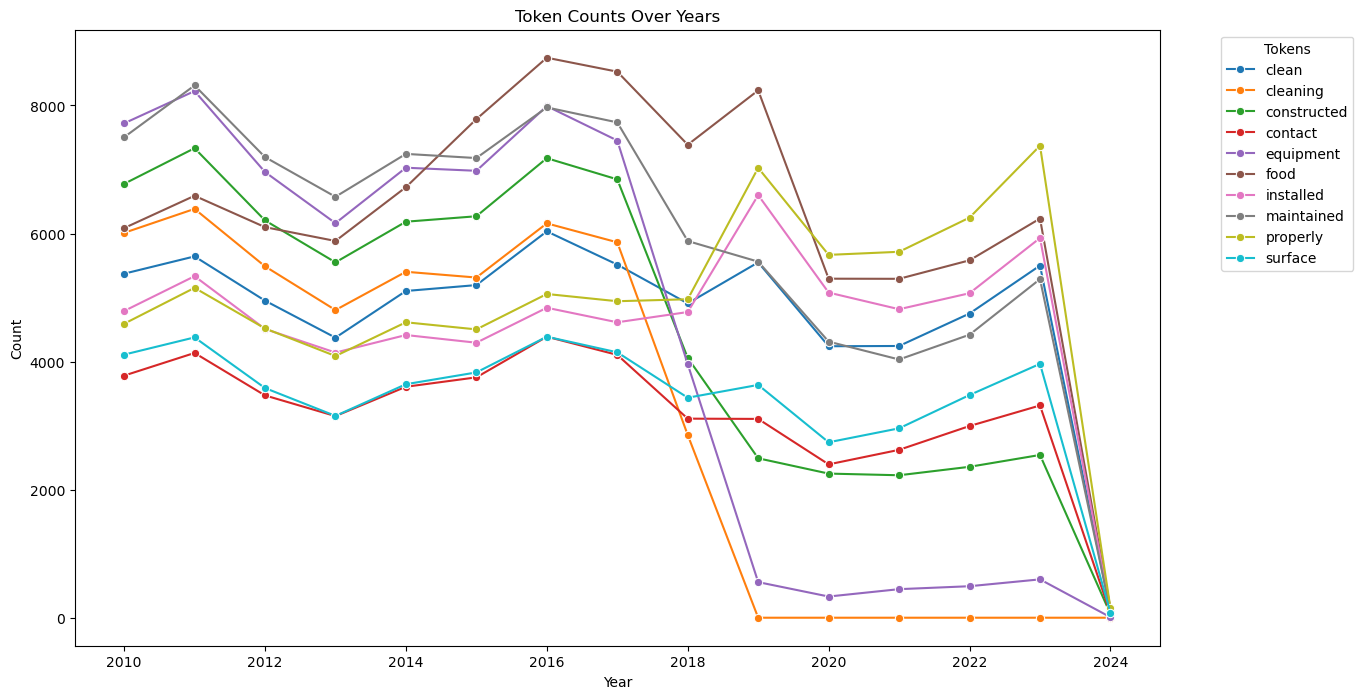

In [114]:
import seaborn as sns
plt.figure(figsize=(14, 8))

# Iterate over columns and plot each token
for token in pivot_df.columns[1:]:
    sns.lineplot(data=pivot_df, x='year', y=token,marker='o', label=token)

plt.title('Top 10 most popular words count Over Years')
plt.xlabel('Year')
plt.ylabel('Count')
plt.legend(title='Tokens', bbox_to_anchor=(1.05, 1), loc='upper left')  # Adjust legend position

plt.show()